# Lengthscale

In [1]:
import sys
sys.path.insert(0, "../../.")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import mu_sigma_mac, zval_mac

In [2]:
mc = 0
delta_m = 0.1
b = 1
b_parameter = "b_value"
cutting = "constant_idx"
transform = False
n_total = 80000

def lengthscale_deltabs(shape):
    if shape == 'gauss':
        delta_bs = np.arange(0.02, 0.22, 0.02)
        length_scales = np.arange(100, 2000, 150)
    elif shape == 'sinus':
        delta_bs = np.arange(0.02, 0.22, 0.02)
        length_scales = np.arange(200, 4000, 300)
    elif shape == 'rectangle':
        delta_bs = np.arange(0.1, 1.1, 0.1)
        length_scales = np.arange(150, 3000, 150)
    else:
        raise ValueError('shape not recognized')
    all_permutations = [
            i
            for i in it.product(
                delta_bs,
                length_scales,
            )
        ]
    all_permutations = np.array(all_permutations)
    # parameter vectors to run through with cl_idx
    cl_delta_bs = all_permutations[:, 0]
    cl_length_scales = all_permutations[:, 1].astype(int)
    return length_scales, delta_bs, cl_length_scales, cl_delta_bs,

def get_string_data(cl_idx, shape):
    if shape == 'gauss':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_"+ shape + str(cl_idx) + ".csv"
            )
    elif shape == 'sinus':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_" + shape + str(cl_idx) + ".csv"
            )
    elif shape == 'rectangle':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_" + shape + str(cl_idx) + ".csv"
            )
    else:
        raise ValueError('shape not recognized')
    return save_str

def get_df(shape):
    df = pd.DataFrame()
    _, _, cl_length_scales, cl_delta_bs, = lengthscale_deltabs(shape)

    for cl_idx in range(len(cl_delta_bs)):
        save_str = get_string_data(cl_idx, shape)
        df_loop = pd.read_csv('../'+save_str, sep=',')
        df_loop['delta b'] = cl_delta_bs[cl_idx]
        df_loop['length scale'] = cl_length_scales[cl_idx]
        # add to df
        df = pd.concat([df, df_loop], ignore_index=True)
    return df

def get_eval_df(shape):
    df = get_df(shape)
    length_scales, delta_bs, _, _ = lengthscale_deltabs(shape)

    max_ig_here = []
    max_ig_next = []
    max_ig_next1 = []
    n_max_ig_here = []
    n_max_ig_next = []
    n_max_ig_next1 = []
    n_max_acf = []
    max_acf = []
    n_max_zval = []
    max_zval = []
    delta_b_all = []
    length_scale_all = []
    sim_number_all = []
    inv_ig_here = []
    inv_ig_next = []
    inv_ig_next1 = []
    
    for delta_b in delta_bs:
        for length_scale in length_scales:
            for sim_num in np.arange(10):
                df_loop = df[(df['delta b'] == delta_b) & (df['length scale'] == length_scale) & (df['sim_number'] == sim_num)]
                ig_here = df_loop['ig_here'].values
                ig_next = df_loop['ig_next'].values
                ig_next1 = df_loop['ig_next1'].values
                n_b = df_loop['n_b'].values
                acf = df_loop['acf'].values
                z_val = zval_mac(acf,n_total/n_b,cutting=cutting)
                n_max_ig_here.append(n_b[np.argmax(ig_here)])
                max_ig_here.append(np.max(ig_here))
                n_max_ig_next.append(n_b[np.argmax(ig_next)])
                max_ig_next.append(max(ig_next))
                n_max_ig_next1.append(n_b[np.argmax(ig_next1)])
                max_ig_next1.append(max(ig_next1))
                n_max_acf.append(n_b[np.argmax(acf)])
                inv_ig_here.append(ig_here[min(3*np.argmax(acf), len(ig_here)-1)])
                inv_ig_next.append(ig_next[np.argmax(acf)])
                inv_ig_next1.append(ig_next1[min(round(1.5*np.argmax(acf)), len(ig_next1)-1)])
                max_acf.append(np.max(acf))
                n_max_zval.append(n_b[np.argmax(z_val)])
                max_zval.append(np.max(z_val))
                delta_b_all.append(delta_b)
                length_scale_all.append(length_scale)
                sim_number_all.append(sim_num)
    
    # estimate the z-score
    n_max_acf=np.array(n_max_acf)
    z_val = zval_mac(max_acf,n_total/n_max_acf,cutting=cutting) 

    # make dataframe of the results
    df_eval = pd.DataFrame({'n_max_ig_here': n_max_ig_here,
                        'max_ig_here': max_ig_here,
                        'n_max_ig_next': n_max_ig_next,
                        'max_ig_next': max_ig_next,
                        'n_max_ig_next1': n_max_ig_next1,
                        'max_ig_next1': max_ig_next1,
                        'n_max_acf': n_max_acf,
                        'inv_ig_here': inv_ig_here,
                        'inv_ig_next': inv_ig_next,
                        'inv_ig_next1': inv_ig_next1,
                        'max_acf': max_acf,
                        'n_max_zval': n_max_zval,
                        'max_zval': max_zval,
                        'delta b': delta_b_all,
                        'length scale': length_scale_all,
                        'sim number': sim_number_all,
                        'z_val': z_val})
    return df_eval

In [3]:
df_eval_gauss = get_eval_df('gauss')
df_eval_sinus = get_eval_df('sinus')
df_eval_rectangle = get_eval_df('rectangle')

# Fig 4: Inverted length scale vs truelength scale (also vs. best IG length scales)

<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3423915571.py:33: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_xlabel('$\lambda_{IG_{next}}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3423915571.py:44: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$\lambda_{inv}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3423915571.py:71: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_xlabel('$\

IG next:  0.65
lost positive:  0
IG mid:  0.9355769230769231
true length:  0.9620192307692308


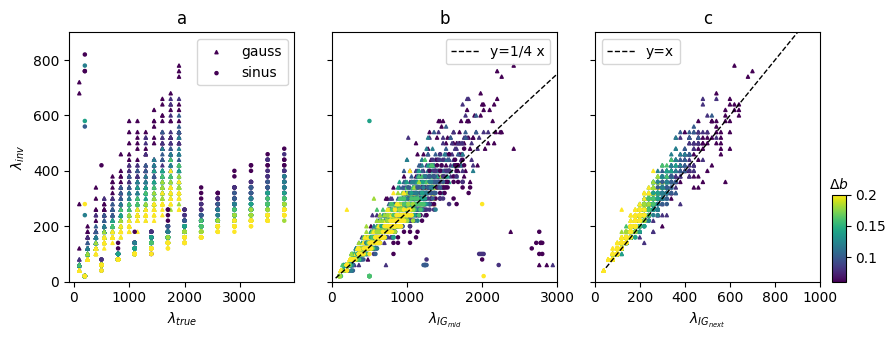

In [4]:
thresh_str = 'delta b'  #--> for filtering
thresh = 0.05

# Create a figure
fig, axs = plt.subplots(1, 4, figsize=(9, 3.5), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})


plt.rcParams.update({'font.size': 10})

ig_str = 'ig_next'
max_str = 'acf'

x1 = np.arange(50,1000)
axs[2].plot(x1,x1, label='y=x', color='k', linestyle='--', linewidth=1)


df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos =  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])
axs[2].yaxis. tick_right() 
axs[2].set_yticklabels([])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos +=  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[2].set_xlabel('$\lambda_{IG_{next}}$')
axs[2].legend()

# set the title
axs[2].set_title('c')

# limits
axs[2].set_xlim(0,1000)
axs[2].set_ylim(0,900)
axs[2].yaxis.tick_left() 
# y label
axs[0].set_ylabel('$\lambda_{inv}$')

# share of models not displayed
print('IG next: ', n_showed/n_total)
# share of lost positive models:
print('lost positive: ', n_notshowedpos)
# =============================================================================
# =============================================================================

ig_str = 'ig_here'
max_str = 'acf'

x1 = np.arange(50,4000)
axs[1].plot(x1,x1/4, label='y=1/4 x', color='k', linestyle='--', linewidth=1)

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<3000) & (df_filter['n_max_'+max_str]<900))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<3000) & (df_filter['n_max_'+max_str]<900))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[1].set_xlabel('$\lambda_{IG_{mid}}$')
axs[1].legend()

# set the title
axs[1].set_title('b')

# limits
axs[1].set_xlim(0,3000)
axs[1].set_ylim(0,900)
axs[1].set_yticklabels([])

# share of models not displayed
print('IG mid: ', n_showed/n_total)
# =============================================================================
# =============================================================================

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum(df_filter['n_max_'+max_str]<900)
cs = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='^', label= 'gauss', c=df_filter['delta b'], s=5)

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum(df_filter['n_max_'+max_str]<900)
axp = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='o', label= 'sinus', c=df_filter['delta b'], s=5)

axs[0].set_xlabel('$\lambda_{true}$')
#axs[2].legend()

# colorbar 
#adding colorbar and its position
import matplotlib.ticker as tkr
cbaxes = fig.add_axes([0.93, 0.18, 0.015, 0.25])  
cb = plt.colorbar(axp, cax = cbaxes, format=tkr.FormatStrFormatter('%.2g'))
cb.set_label('$\Delta b$', labelpad=-34, y=1.2, rotation=0)
axs[0].set_ylim(0,900)
axs[0].set_title('a')
axs[0].legend()

axs[3].set_axis_off()


# share of models not displayed
print('true length: ', n_showed/n_total)

import matplotlib.pyplot as pyplt
pyplt.rcParams["figure.figsize"] = (18, 10)
# tight
plt.tight_layout()



# Fig 5: Relation between positive information gain and maximum MAC

<>:40: SyntaxWarning: invalid escape sequence '\o'
<>:41: SyntaxWarning: invalid escape sequence '\o'
<>:40: SyntaxWarning: invalid escape sequence '\o'
<>:41: SyntaxWarning: invalid escape sequence '\o'
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/1202737794.py:40: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(bins[frac.index-1], frac.values, label='$max$ $\overline{IG}_{mid}$', color='lightgrey')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/1202737794.py:41: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(bins[frac.index-1], frac.values, label='$max$ $\overline{IG}_{next}$', color='dimgrey')


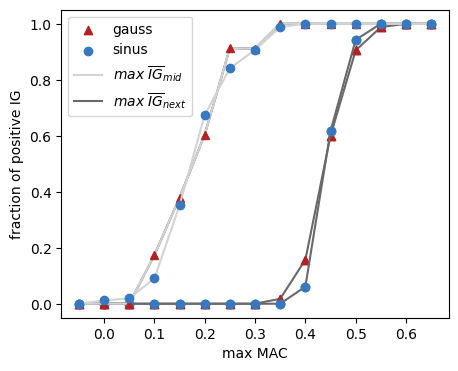

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

def calc_frac(df_chosen, bins, ig_str, variable):
    # bin the data
    df_chosen['bin'] = np.digitize(df_chosen[variable], bins + 0.025)
    ntot = df_chosen.groupby('bin').size()
    npos = df_chosen.query('inv_'+ig_str+'>0').groupby('bin').size()
    # set empty bins to zero
    for i in range(1, len(bins)):
        if i not in npos.index:
            npos.loc[i] = 0
    # order
    npos = npos.sort_index()

    # calculate fraction of positive IG 
    frac = npos/ntot
    return frac

ig_str = 'ig_next'
variable = 'max_acf'
bins = np.arange(-0.1,0.7,0.05)

frac = calc_frac(df_eval_gauss, bins, ig_str, variable)
plt.scatter(bins[frac.index-1], frac.values, label='gauss', marker='^', color='firebrick')
frac = calc_frac(df_eval_gauss, bins, ig_str, variable)
plt.plot(bins[frac.index-1], frac.values, marker='^', color='dimgrey', markerfacecolor='firebrick', markeredgecolor='firebrick')

#frac = calc_frac(df_eval_rectangle, bins, ig_str, variable)
#plt.scatter(bins[frac.index-1], frac.values, label='rectangle', marker='o', color='goldenrod')
#plt.plot(bins[frac.index-1], frac.values, marker='o', color='dimgrey', markerfacecolor='goldenrod', markeredgecolor='goldenrod')

frac = calc_frac(df_eval_sinus, bins, ig_str, variable)
plt.scatter(bins[frac.index-1], frac.values, label='sinus', marker='o', color='#3778bf')
plt.plot(bins[frac.index-1], frac.values, marker='o', color='dimgrey', markerfacecolor='#3778bf', markeredgecolor='#3778bf')

ig_str = 'ig_here'
variable = 'max_acf'

frac = calc_frac(df_eval_gauss, bins, ig_str, variable)
plt.plot(bins[frac.index-1], frac.values, label='$max$ $\overline{IG}_{mid}$', color='lightgrey')
plt.plot(bins[frac.index-1], frac.values, label='$max$ $\overline{IG}_{next}$', color='dimgrey')
plt.plot(bins[frac.index-1], frac.values, marker='^', color='lightgrey', markerfacecolor='firebrick', markeredgecolor='firebrick')

#frac = calc_frac(df_eval_rectangle, bins, ig_str, variable)
#plt.plot(bins[frac.index-1], frac.values, marker='^', color='lightgrey', markerfacecolor='goldenrod', markeredgecolor='goldenrod')

frac = calc_frac(df_eval_sinus, bins, ig_str, variable)
plt.plot(bins[frac.index-1], frac.values, marker='o',  color='lightgrey', markerfacecolor='#3778bf', markeredgecolor='#3778bf')

# add labels
plt.xlabel('max MAC')
plt.ylabel('fraction of positive IG')

plt.legend()


# Fig S6-8: More details on length scale analysis

<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/396462237.py:33: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_xlabel('$\lambda_{IG_{next}}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/396462237.py:44: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$\lambda_{inv}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/396462237.py:71: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_xlabel('$\lam

IG next:  0.65
lost positive:  0
IG mid:  0.9432692307692307
true length:  1.0


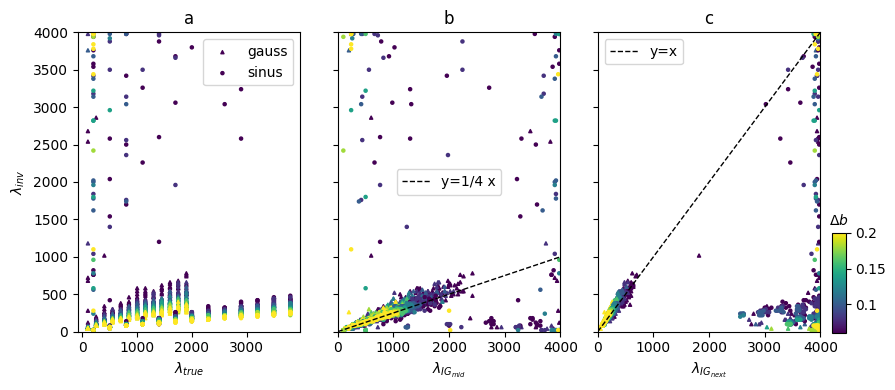

In [6]:
thresh_str = 'delta b'  #--> for filtering
thresh = 0.05

# Create a figure
fig, axs = plt.subplots(1, 4, figsize=(9, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})


plt.rcParams.update({'font.size': 10})

ig_str = 'ig_next'
max_str = 'acf'

x1 = np.arange(0,4000)
axs[2].plot(x1,x1, label='y=x', color='k', linestyle='--', linewidth=1)


df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos =  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])
axs[2].yaxis. tick_right() 
axs[2].set_yticklabels([])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos +=  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[2].set_xlabel('$\lambda_{IG_{next}}$')
axs[2].legend()

# set the title
axs[2].set_title('c')

# limits
axs[2].set_xlim(0,4000)
axs[2].set_ylim(0,4000)
axs[2].yaxis.tick_left() 
# y label
axs[0].set_ylabel('$\lambda_{inv}$')

# share of models not displayed
print('IG next: ', n_showed/n_total)
# share of lost positive models:
print('lost positive: ', n_notshowedpos)
# =============================================================================
# =============================================================================

ig_str = 'ig_here'
max_str = 'acf'

x1 = np.arange(0,4000)
axs[1].plot(x1,x1/4, label='y=1/4 x', color='k', linestyle='--', linewidth=1)

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<4000) & (df_filter['n_max_'+max_str]<4000))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<3000) & (df_filter['n_max_'+max_str]<900))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[1].set_xlabel('$\lambda_{IG_{mid}}$')
axs[1].legend()

# set the title
axs[1].set_title('b')

# limits
axs[1].set_xlim(0,4000)
axs[1].set_ylim(0,4000)
axs[1].set_yticklabels([])

# share of models not displayed
print('IG mid: ', n_showed/n_total)
# =============================================================================
# =============================================================================

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum(df_filter['n_max_'+max_str]<4000)
cs = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='^', label= 'gauss', c=df_filter['delta b'], s=5)

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum(df_filter['n_max_'+max_str]<4000)
axp = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='o', label= 'sinus', c=df_filter['delta b'], s=5)

axs[0].set_xlabel('$\lambda_{true}$')
#axs[2].legend()

# colorbar 
#adding colorbar and its position
import matplotlib.ticker as tkr
cbaxes = fig.add_axes([0.93, 0.155, 0.015, 0.25])  
cb = plt.colorbar(axp, cax = cbaxes, format=tkr.FormatStrFormatter('%.2g'))
cb.set_label('$\Delta b$', labelpad=-34, y=1.2, rotation=0)
axs[0].set_ylim(0,4000)
axs[0].set_title('a')
axs[0].legend()

axs[3].set_axis_off()


# share of models not displayed
print('true length: ', n_showed/n_total)

import matplotlib.pyplot as pyplt
pyplt.rcParams["figure.figsize"] = (18, 10)
# tight
plt.tight_layout()



<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/1980049175.py:33: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_xlabel('$\lambda_{IG_{next}}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/1980049175.py:44: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$\lambda_{inv}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/1980049175.py:71: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_xlabel('$\

IG next:  0.051923076923076926
lost positive:  0
IG mid:  0.6442307692307693
true length:  1.0


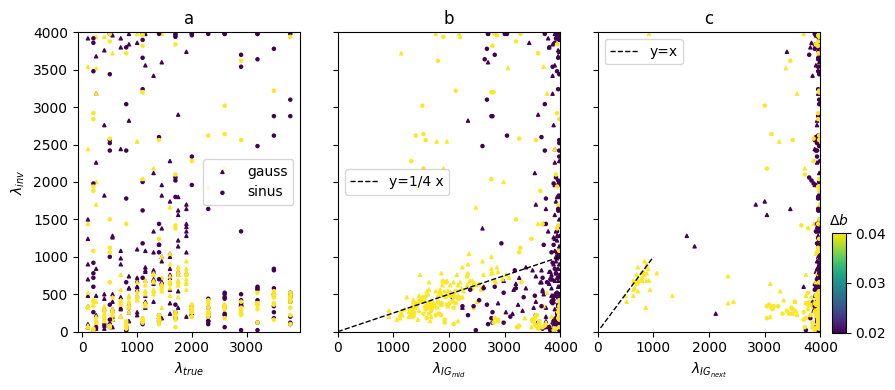

In [7]:
thresh_str = 'delta b'  #--> for filtering
thresh = 0.05

# Create a figure
fig, axs = plt.subplots(1, 4, figsize=(9, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})


plt.rcParams.update({'font.size': 10})

ig_str = 'ig_next'
max_str = 'acf'

x1 = np.arange(50,1000)
axs[2].plot(x1,x1, label='y=x', color='k', linestyle='--', linewidth=1)


df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos =  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])
axs[2].yaxis. tick_right() 
axs[2].set_yticklabels([])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos +=  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[2].set_xlabel('$\lambda_{IG_{next}}$')
axs[2].legend()

# set the title
axs[2].set_title('c')

# limits
axs[2].set_xlim(0,4000)
axs[2].set_ylim(0,4000)
axs[2].yaxis.tick_left() 
# y label
axs[0].set_ylabel('$\lambda_{inv}$')

# share of models not displayed
print('IG next: ', n_showed/n_total)
# share of lost positive models:
print('lost positive: ', n_notshowedpos)
# =============================================================================
# =============================================================================

ig_str = 'ig_here'
max_str = 'acf'

x1 = np.arange(0,4000)
axs[1].plot(x1,x1/4, label='y=1/4 x', color='k', linestyle='--', linewidth=1)

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<4000) & (df_filter['n_max_'+max_str]<4000))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<3000) & (df_filter['n_max_'+max_str]<900))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[1].set_xlabel('$\lambda_{IG_{mid}}$')
axs[1].legend()

# set the title
axs[1].set_title('b')

# limits
axs[1].set_xlim(0,4000)
axs[1].set_ylim(0,4000)
axs[1].set_yticklabels([])

# share of models not displayed
print('IG mid: ', n_showed/n_total)
# =============================================================================
# =============================================================================

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total = len(df_filter)
n_showed = np.sum(df_filter['n_max_'+max_str]<4000)
cs = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='^', label= 'gauss', c=df_filter['delta b'], s=5)

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] < thresh)]
n_total += len(df_filter)
n_showed += np.sum(df_filter['n_max_'+max_str]<4000)
axp = axs[0].scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='o', label= 'sinus', c=df_filter['delta b'], s=5)

axs[0].set_xlabel('$\lambda_{true}$')
#axs[2].legend()

# colorbar 
#adding colorbar and its position
import matplotlib.ticker as tkr
cbaxes = fig.add_axes([0.93, 0.155, 0.015, 0.25])  
cb = plt.colorbar(axp, cax = cbaxes, format=tkr.FormatStrFormatter('%.2g'))
cb.set_label('$\Delta b$', labelpad=-34, y=1.2, rotation=0)
axs[0].set_ylim(0,4000)
axs[0].set_title('a')
axs[0].legend()

axs[3].set_axis_off()


# share of models not displayed
print('true length: ', n_showed/n_total)

import matplotlib.pyplot as pyplt
pyplt.rcParams["figure.figsize"] = (18, 10)
# tight
plt.tight_layout()



<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:107: SyntaxWarning: invalid escape sequence '\D'
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3417343983.py:33: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_xlabel('$\lambda_{IG_{next}}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3417343983.py:44: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$\lambda_{p}$')
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_67185/3417343983.py:71: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_xlabel('$\la

IG next:  0.65
lost positive:  0
IG mid:  0.9990384615384615
true length:  0.9990384615384615


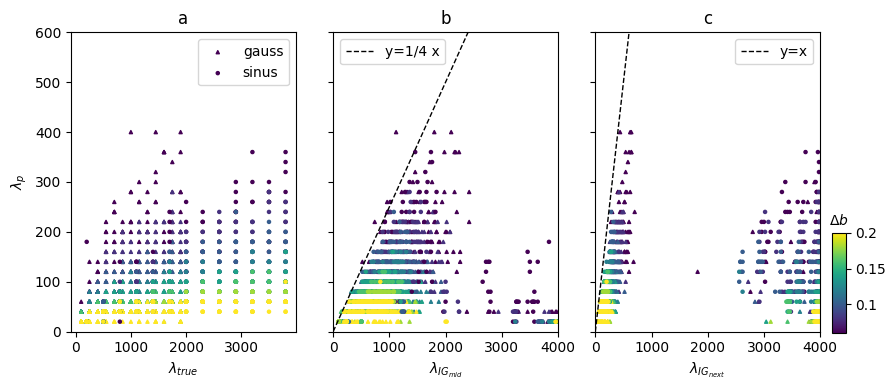

In [8]:
thresh_str = 'delta b'  #--> for filtering
thresh = 0.05

# Create a figure
fig, axs = plt.subplots(1, 4, figsize=(9, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})


plt.rcParams.update({'font.size': 10})

ig_str = 'ig_next'
max_str = 'zval'

x1 = np.arange(0,1000)
axs[2].plot(x1,x1, label='y=x', color='k', linestyle='--', linewidth=1)


df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos =  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])
axs[2].yaxis. tick_right() 
axs[2].set_yticklabels([])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<1000) & (df_filter['n_max_'+max_str]<900))
n_notshowedpos +=  np.sum((df_filter['n_max_'+ig_str]>1000) & (df_filter['n_max_'+max_str]>900) & (df_filter['max_'+ig_str]>0))
axs[2].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[2].set_xlabel('$\lambda_{IG_{next}}$')
axs[2].legend()

# set the title
axs[2].set_title('c')

# limits
axs[2].set_xlim(0,4000)
axs[2].set_ylim(0,600)
axs[2].yaxis.tick_left() 
# y label
axs[0].set_ylabel('$\lambda_{p}$')

# share of models not displayed
print('IG next: ', n_showed/n_total)
# share of lost positive models:
print('lost positive: ', n_notshowedpos)
# =============================================================================
# =============================================================================

ig_str = 'ig_here'
max_str = 'zval'

x1 = np.arange(0,4000)
axs[1].plot(x1,x1/4, label='y=1/4 x', color='k', linestyle='--', linewidth=1)

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum((df_filter['n_max_'+ig_str]<4000) & (df_filter['n_max_'+max_str]<600))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='^', s=5, c=df_filter['delta b'])

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum((df_filter['n_max_'+ig_str]<4000) & (df_filter['n_max_'+max_str]<600))
axs[1].scatter(df_filter['n_max_'+ig_str], df_filter['n_max_'+max_str], marker='o', s=5, c=df_filter['delta b'])

axs[1].set_xlabel('$\lambda_{IG_{mid}}$')
axs[1].legend()

# set the title
axs[1].set_title('b')

# limits
axs[1].set_xlim(0,4000)
axs[1].set_ylim(0,600)
axs[1].set_yticklabels([])

# share of models not displayed
print('IG mid: ', n_showed/n_total)
# =============================================================================
# =============================================================================

df_filter = df_eval_gauss
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total = len(df_filter)
n_showed = np.sum(df_filter['n_max_'+max_str]<600)
cs = axs[0].scatter(df_filter['length scale'], df_filter['n_max_zval'], marker='^', label= 'gauss', c=df_filter['delta b'], s=5)

df_filter = df_eval_sinus
df_filter = df_filter[(df_filter[thresh_str] > thresh)]
n_total += len(df_filter)
n_showed += np.sum(df_filter['n_max_'+max_str]<600)
axp = axs[0].scatter(df_filter['length scale'], df_filter['n_max_zval'], marker='o', label= 'sinus', c=df_filter['delta b'], s=5)

axs[0].set_xlabel('$\lambda_{true}$')
#axs[2].legend()

# colorbar 
#adding colorbar and its position
import matplotlib.ticker as tkr
cbaxes = fig.add_axes([0.93, 0.155, 0.015, 0.25])  
cb = plt.colorbar(axp, cax = cbaxes, format=tkr.FormatStrFormatter('%.2g'))
cb.set_label('$\Delta b$', labelpad=-34, y=1.2, rotation=0)
axs[0].set_ylim(0,600)
axs[0].set_title('a')
axs[0].legend()

axs[3].set_axis_off()


# share of models not displayed
print('true length: ', n_showed/n_total)

import matplotlib.pyplot as pyplt
pyplt.rcParams["figure.figsize"] = (18, 10)
# tight
plt.tight_layout()

